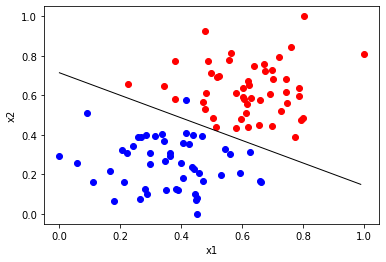

In [134]:
#implementation of logistic regression with 1 feature and 2 classes
import numpy as np
from numpy.random import randn, uniform
from numpy import matmul
from math import log10
import matplotlib.pyplot as plt


def vector_sigmoid(vector):
    # apply the sigmoid function to all elements of a vector
    return 1 / (1 + 2.718 ** -vector)


def normalized(vector): 
    return (vector - min(vector)) / (max(vector) - min(vector))


def get_derivative(X, y, theta, theta_index):
    # get the partial derivative of the cost function relative to x[theta_index] (for each training example)
    return (1 / m) * sum((vector_sigmoid(matmul(X, theta)) - y) * X[:, theta_index])


m = 100
m_div = m // 2 # number of examples in each cluster
X = np.array((np.ones(m), 
              np.append(randn(m_div) + uniform(0, 10), randn(m_div) + uniform(4, 6)),
              np.append(randn(m_div) + uniform(0, 10), randn(m_div) + uniform(4, 6)),))
y = np.append(np.zeros(m_div), np.ones(m_div))


X[1:] = np.array([normalized(x) for x in X[1:]]) # normalize X
y = normalized(y)                                # normalize y

X = X.T # for easier computation

theta = np.full(len(X[0]), 0.5)
delta_theta = np.ones(theta.shape)
a = 10 # learning rate

i = 0
while abs(sum(delta_theta)) > 5 * 10 ** -4: # controls the needed decrease in cost to continue 
    for t in range(len(delta_theta)):
        delta_theta[t] = - a * get_derivative(X, y, theta, t)
    theta += delta_theta
    i += 1
#     print(i, theta, delta_theta)
#     plt.scatter(X[:, 1][:m_div], X[:, 2][:m_div], color='b')
#     plt.scatter(X[:, 1][m_div:], X[:, 2][m_div:], color='r')
#     accuracy = 100
#     sig_x_values = np.arange(0, 1, 1 / accuracy)
#     divisor_x_values = sig_x_values
#     divisor_y_values = (-theta[0] - divisor_x_values * theta[1]) / theta[2]
#     plt.plot(divisor_x_values, divisor_y_values, color='black', linewidth='1') # show point where the sigmoid function reaches 0.5
#     plt.show()
#     plt.pause(0.001)
#     plt.clf()

plt.scatter(X[:, 1][:m_div], X[:, 2][:m_div], color='b')
plt.scatter(X[:, 1][m_div:], X[:, 2][m_div:], color='r')

accuracy = 100
sig_x_values = np.arange(0, 1, 1 / accuracy)

divisor_x_values = sig_x_values
divisor_y_values = (-theta[0] - divisor_x_values * theta[1]) / theta[2] # derived from sigmoid(X*theta) = 0.5
plt.plot(divisor_x_values, divisor_y_values, color='black', linewidth='1') # show point where the sigmoid function reaches 0.5

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()